In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix as cm

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X.shape

(70000, 784)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                    random_state=0)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier?
dt = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 4)

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [6]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

In [7]:
# MODEL EVALUATION
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.3407857142857143

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=dt.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.32      0.80      0.45      1387
           1       0.53      0.86      0.66      1580
           2       0.00      0.00      0.00      1443
           3       0.43      0.73      0.54      1435
           4       0.00      0.00      0.00      1350
           5       0.00      0.00      0.00      1231
           6       0.00      0.00      0.00      1387
           7       0.23      0.86      0.36      1458
           8       0.00      0.00      0.00      1368
           9       0.00      0.00      0.00      1361

    accuracy                           0.34     14000
   macro avg       0.15      0.33      0.20     14000
weighted avg       0.16      0.34      0.21     14000



<function matplotlib.pyplot.suptitle(t, **kwargs)>

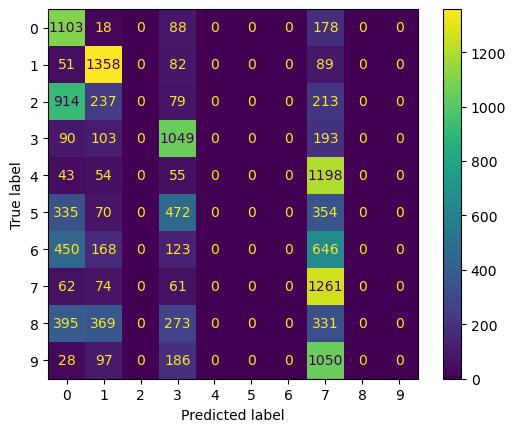

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 #from sklearn.metrics import classification_report
 #assuming 'knn' is your trained model, 'X_test' are your test features
predictions = dt.predict(X_test)
cm = confusion_matrix(y_test, predictions)
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.suptitle

# BAGGING

In [47]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier?

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
bag = BaggingClassifier(knn,
                      max_samples = .5,
                      max_features = 28,
                       n_estimators = 20)

Init signature:
BaggingClassifier(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    base_estimator='deprecated',
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If

In [48]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=28,
                  max_samples=0.5, n_estimators=20)

In [49]:
BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors = 3),
                 max_features = 30,
                 max_samples = .5,
                 n_jobs = 5,
                 oob_score = True)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                  max_features=30, max_samples=0.5, n_jobs=5, oob_score=True)

In [50]:
# MODEL EVALUATION
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.9100714285714285

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=bag.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1387
           1       0.90      0.99      0.94      1580
           2       0.94      0.91      0.93      1443
           3       0.87      0.90      0.88      1435
           4       0.91      0.88      0.90      1350
           5       0.94      0.85      0.89      1231
           6       0.93      0.96      0.95      1387
           7       0.90      0.92      0.91      1458
           8       0.94      0.86      0.90      1368
           9       0.85      0.84      0.85      1361

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



<function matplotlib.pyplot.suptitle(t, **kwargs)>

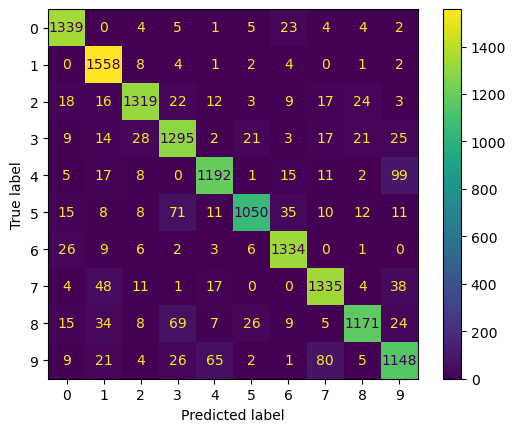

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 #from sklearn.metrics import classification_report
 #assuming 'knn' is your trained model, 'X_test' are your test features
predictions = bag.predict(X_test)
cm = confusion_matrix(y_test, predictions)
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bag.classes_)
disp.plot()
plt.suptitle

# RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [18]:
rf = RandomForestClassifier(n_estimators = 20)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [20]:
# MODEL EVALUATION
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9563571428571429

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=rf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1387
           1       0.98      0.99      0.98      1580
           2       0.94      0.96      0.95      1443
           3       0.94      0.93      0.93      1435
           4       0.96      0.97      0.96      1350
           5       0.94      0.93      0.94      1231
           6       0.96      0.98      0.97      1387
           7       0.97      0.95      0.96      1458
           8       0.95      0.93      0.94      1368
           9       0.94      0.93      0.94      1361

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



<function matplotlib.pyplot.suptitle(t, **kwargs)>

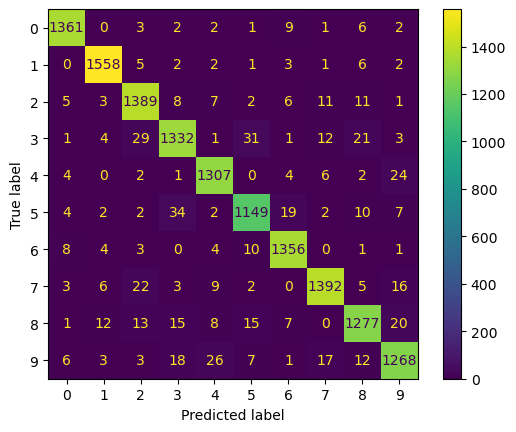

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 #from sklearn.metrics import classification_report
 #assuming 'knn' is your trained model, 'X_test' are your test features
predictions = rf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.suptitle

# ADA BOOST CLASSIFIER

In [23]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostClassifier?

Init signature:
AdaBoostClassifier(
    estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
    base_estimator='deprecated',
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifi

In [60]:
ada = AdaBoostClassifier(
                         n_estimators = 100,
                       random_state=4,
                       algorithm='SAMME.R' )
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=4)

In [61]:
# MODEL EVALUATION
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.7426428571428572

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=ada.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1387
           1       0.82      0.94      0.88      1580
           2       0.77      0.56      0.65      1443
           3       0.75      0.64      0.69      1435
           4       0.77      0.73      0.75      1350
           5       0.71      0.63      0.67      1231
           6       0.70      0.90      0.79      1387
           7       0.78      0.72      0.75      1458
           8       0.68      0.70      0.69      1368
           9       0.60      0.68      0.64      1361

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



Text(0.5, 0.98, 'Confusion Matrix')

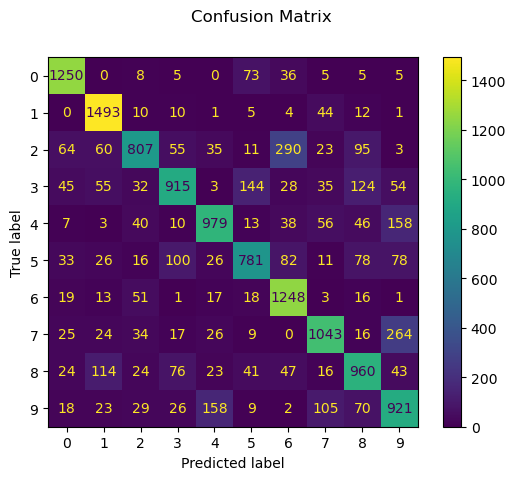

In [57]:
predictions = ada.predict(X_test)
cm = confusion_matrix(y_test, predictions)
 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()
plt.suptitle('Confusion Matrix')